<a href="https://colab.research.google.com/github/Hgherzog/mlpractice/blob/main/fisheririsdimreduc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from numpy.lib.shape_base import column_stack
from numpy.core.fromnumeric import shape
import numpy as np
#Graham Schmidt orthoganilization (transform an n by p matrix)
# into an orthonormal n by p matrix working on columns
# Assume all 1-d matrices are passed in as columns  
def gs(M):
  if not np.any(M):
    return
  width = np.shape(M)[1]
  d=0
  if width == 1:
    return M
  #Check if first column is zero and update M accordingly
  for i in range (width):
    if not np.any(M[:,i]):
      np.delete(M,i, axis=1)
  width = np.shape(M)[1]
  for i in range(width):
      #Base case first
    if i == 0:
        X=M[:,i] / np.linalg.norm(M[:,i])
    else:
      if X.ndim == 1 and np.any(X):
        #check if the vector isnt 0
        d=d + (X@M[:,i].T)*X / (X@X)
      else: 
        if X.ndim ==1:
          widthX=1
        else:
          widthX=np.shape(X)[1]
        for j in range(widthX):
            #check if the vector isn't zero
            if np.any(X[:, j]):
              d=d + (X[:,j]@M[:,i])*X[:,j] * (1/  (X[:, j]@X[:, j]))
      u_next= M[:,i] - d
      d=0
      if np.any(u_next):
        u_next = u_next / np.linalg.norm(u_next)
        if X.ndim == 1:
          X=column_stack((X,u_next))
        else:
          X=np.append(X,np.atleast_2d(u_next).T, axis = 1)
  return X


        
  

test1=np.array([[5,4,3],[2, 1, 1], [6,2,1]])
test2= np.array([[2,4, 7],[3,6,-2],[2,4,-3]])
test3=np.array([[2, 7],[3,-2],[2,-3]])
print(gs(test1))
print(gs(test2))
print(gs(test3))

[[ 0.62017367  0.77216958 -0.13834289]
 [ 0.24806947 -0.02573899  0.96840025]
 [ 0.74420841 -0.63489499 -0.20751434]]
[[ 0.48507125  0.86075337]
 [ 0.72760688 -0.29939248]
 [ 0.48507125 -0.41166465]]
[[ 0.48507125  0.86075337]
 [ 0.72760688 -0.29939248]
 [ 0.48507125 -0.41166465]]


In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.lib.display import IFrame
import scipy.io as sio
data_file=sio.loadmat('fisheriris.mat')
X = data_file['meas']
y = data_file['species']

#string to number function
def l_num(s):
  if s == 'setosa':
    return 1
  elif s == 'versicolor':
    return 2
  elif s == 'virginica':
    return 3


vfunc=np.vectorize(l_num)

yp=vfunc(y)

def classify(x):
  if x < 1.5:
    return 1
  elif x >= 1.5 and x <2.5:
    return 2
  else:
    return 3
err_perc=0
#6b) train a classifier on different subsets of data with the 10 randomly chosen points
# removed from each set then see how many correct guys out of 30 to get error perc then we will test it
for i in range(1000):
  q=10
  #first ranomly remove 10 and form the training and the test data
  r_nums=np.random.choice(50, q, replace=False)
  r_nums1=np.random.choice(50, q, replace=False) + 50
  r_nums2=np.random.choice(50, q, replace=False) + 100
  test_rows=np.sort(np.concatenate((r_nums,r_nums1,r_nums2)))
  #print(test_rows)
  t=len(test_rows)
  X_Train=np.delete(X, test_rows, axis=0)
  y_train=np.delete(yp,test_rows)
  X_Test=[X[test_rows[m]] for m in range(t)]
  y_test=[yp[test_rows[n]] for n in range(t)]
  #do least squares to find the weights
  w = np.linalg.inv(X_Train.T@X_Train) @X_Train.T@y_train
  #test the accuracy of the prediction
  count=0
  for a in range(t):
    if classify(X_Test[a]@w) != y_test[a]:
      count=count+1
  err_perc = (count/ (3*q)) + err_perc
  count = 0
err_mean=err_perc / 1000
print(err_mean)



0.04073333333333366


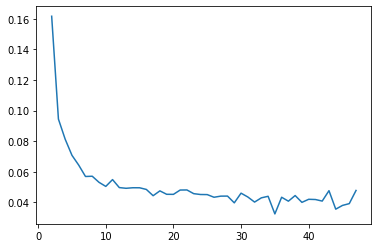

In [ ]:
#6c Smaller TRaining set experimentation
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.lib.display import IFrame
import scipy.io as sio
data_file=sio.loadmat('fisheriris.mat')
X = data_file['meas']
y = data_file['species']

#fucntion calculates the average error for a training sample of size p
def p_training(p):
  err_mean=0
  err_perc=0
  err_total=0
  q=50-p
  for i in range(100):
  #first randomly remove q and form the training and the test data
    r_nums=np.random.choice(50, q, replace=False)
    r_nums1=np.random.choice(50, q, replace=False) + 50
    r_nums2=np.random.choice(50, q, replace=False) + 100
    test_rows=np.sort(np.concatenate((r_nums,r_nums1,r_nums2)))
    t1=len(test_rows)
    X_Train=np.delete(X, test_rows, axis=0)
    y_train=np.delete(yp,test_rows)
    X_Test=[X[test_rows[m]] for m in range(t1)]
    y_test=[yp[test_rows[n]] for n in range(t1)]
    #do least squares to find the weights
    w = np.linalg.inv(X_Train.T@X_Train) @X_Train.T@y_train
    #test the accuracy of the prediction
    count=0
    for a in range(t1):
      if classify(X_Test[a]@w) != y_test[a]:
        count=count+1
    err_perc = (count/ (q*3)) 
    err_total=err_total + err_perc
    count = 0
  err_mean=err_total / 100
  return err_mean

#Graph training size vs average error

out_v=np.vectorize(p_training)
x_d =np.arange(2,48)
#print(x_d)
y_out=out_v(x_d)
plt.plot(x_d,y_out)






In [ ]:
#6d) Now design a classifier with only first 3 elements
err_mean=0
for i in range(100):
  #first ranomly remove 10 and form the training and the test data
  r_nums=np.random.choice(50, 10, replace=False)
  r_nums1=[r_nums[j] + 50 for j in range(10)]
  r_nums2=[r_nums1[k] + 50 for k in range(10)]
  test_rows=np.sort(np.concatenate((r_nums,r_nums1,r_nums2)))
  t=len(test_rows)
  X_Train1=np.delete(X, test_rows, axis=0)
  X_Train=np.delete(X_Train1,3, axis=1)
  y_train=np.delete(yp,test_rows)
  X_Test1=[X[test_rows[m], :] for m in range(t)]
  X_Test=np.delete(X_Test1,3, axis=1)
  y_test=[yp[test_rows[n]] for n in range(t)]
  #do least squares to find the weights
  w = np.linalg.inv(X_Train.T@X_Train) @X_Train.T@y_train
  #test the accuracy of the prediction
  count=0
  for a in range(t):
    if classify(X_Test[a]@w) != y_test[a]:
      count=count+1
  err_perc = (count/ 30) +err_perc
  count = 0
err_mean =err_perc / 100
print(err_mean)
err_perc=0
err_mean=0



NameError: ignored